In [169]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [4]:
print(os.getcwd())

print(os.listdir())

/Users/barbem4/Desktop/Vandy/Bioinformatics
['.DS_Store', 'ancestry_map_1k_var.pkl', 'BNB - Ancestry prediction - BMIF6310.ipynb', '.ipynb_checkpoints']


In [180]:
data_df = pd.read_pickle('ancestry_map_1k_var.pkl')
data_df

,POS,REF,ALT,INFO,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,NaN,NaN,NaN,NaN,EUR,EUR,EUR,EUR,EUR,EUR,...,SAS,SAS,SAS,SAS,SAS,SAS,SAS,SAS,SAS,SAS
1,10416,CCCTAA,C,AC=240;AN=5096;DP=365460;AF=0.05;EAS_AF=0.06;EUR_AF=0.07;AFR_AF=0.01;AMR_AF=0.06;SAS_AF=0.05;VT=INDEL;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16103,T,G,AC=118;AN=5096;DP=29994;AF=0.02;EAS_AF=0;EUR_AF=0.04;AFR_AF=0.03;AMR_AF=0.03;SAS_AF=0.01;VT=SNP;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,17496,AC,A,AC=25;AN=5096;DP=189765;AF=0;EAS_AF=0;EUR_AF=0;AFR_AF=0.02;AMR_AF=0;SAS_AF=0;VT=INDEL;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51479,T,A,AC=531;AN=5096;DP=17461;AF=0.1;EAS_AF=0;EUR_AF=0.19;AFR_AF=0.02;AMR_AF=0.11;SAS_AF=0.23;VT=SNP;NS=2548,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,839006,CAG,C,AC=8;AN=5096;DP=16336;AF=0;EAS_AF=0;EUR_AF=0;AFR_AF=0;AMR_AF=0;SAS_AF=0;VT=INDEL;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,839011,G,T,AC=31;AN=5096;DP=17353;AF=0.01;EAS_AF=0;EUR_AF=0;AFR_AF=0.02;AMR_AF=0;SAS_AF=0;VT=SNP;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,839166,TGAGA,T,AC=110;AN=5096;DP=18786;AF=0.02;EAS_AF=0;EUR_AF=0;AFR_AF=0.08;AMR_AF=0.01;SAS_AF=0;VT=INDEL;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,839201,G,GA,AC=38;AN=5096;DP=19102;AF=0.01;EAS_AF=0;EUR_AF=0;AFR_AF=0.03;AMR_AF=0;SAS_AF=0;VT=INDEL;NS=2548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X = data_df.iloc[1:,4:].values.T
unique, counts = np.unique(X, return_counts=True)
print(dict(zip(unique, counts)))
print(X.shape)

{'0': 2366529, '1': 116952, '2': 64519}
(2548, 1000)


In [7]:
y = data_df.iloc[0,4:].values
y.shape

(2548,)

## Bernouilli Naive Bayes

Bernoulli Naive Bayes — adaptation for boolean attributes
If you have binary-valued attributes (Bernoulli, boolean), then you can use a Bernoulli NB model.

Naive Bayes' underlying assumption is that the predictors (attributes / independent variables) are independent of each other. This is a big assumption because it is easy to show that there is often at least some correlation between variables in real life. It is precisely this assumption of independence that makes Bayes classification “naive.

In [8]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
#Split dataset 70/20/10: train/val/test
X_train, X_test, y_train, y_test = train_test_split(X,y.T, train_size=0.70, shuffle = True)

X_train.shape

(1783, 1000)

In [10]:
#Alpha hyperparameter (laplacian smoothing) does not really affect this task as long as it is close to zero -> we dont artificially impact probabilities coming from data
#Avoid zero as this could give null posterior probabilities as a result of some zero likelihood probabilities coming from lack of some fearture-class example in trainign datset
Bnb = BernoulliNB(alpha = 0.0001, binarize = 0.5)

In [11]:
Bnb.fit(X_train, y_train)

BernoulliNB(alpha=0.0001, binarize=0.5)

In [12]:
# Predict class labels on a test data
pred_labels = Bnb.predict(X_test)

# Print model performance sumamry
print(f"n\n\Classification report on test set for classifier {Bnb}:\n"
f"{metrics.classification_report(y_test,pred_labels)}\n")

n
\Classification report on test set for classifier BernoulliNB(alpha=0.0001, binarize=0.5):
              precision    recall  f1-score   support

         AFR       0.90      0.90      0.90       197
         AMR       0.56      0.57      0.56       119
         EAS       0.85      0.97      0.90       147
         EUR       0.68      0.70      0.69       155
         SAS       0.83      0.67      0.74       147

    accuracy                           0.78       765
   macro avg       0.76      0.76      0.76       765
weighted avg       0.78      0.78      0.78       765




In [159]:
counting = list(y_test[pred_labels!=y_test]).count
totals_count = list(y_test).count
labels = Bnb.classes_

In [160]:
#Error/False negative rate for each class: 1-recall
FNR =[np.round(100*counting(x)/totals_count(x),decimals=2) for x in Bnb.classes_]
print(Bnb.classes_,"\n",FNR,"%FNR")

['AFR' 'AMR' 'EAS' 'EUR' 'SAS'] 
 [9.64, 42.86, 3.4, 30.32, 32.65] %FNR


In [161]:
results = data_df.iloc[1:,0:4]
results

,POS,REF,ALT,INFO
1,10416,CCCTAA,C,AC=240;AN=5096;DP=365460;AF=0.05;EAS_AF=0.06;EUR_AF=0.07;AFR_AF=0.01;AMR_AF=0.06;SAS_AF=0.05;VT=INDEL;NS=2548
2,16103,T,G,AC=118;AN=5096;DP=29994;AF=0.02;EAS_AF=0;EUR_AF=0.04;AFR_AF=0.03;AMR_AF=0.03;SAS_AF=0.01;VT=SNP;NS=2548
3,17496,AC,A,AC=25;AN=5096;DP=189765;AF=0;EAS_AF=0;EUR_AF=0;AFR_AF=0.02;AMR_AF=0;SAS_AF=0;VT=INDEL;NS=2548
4,51479,T,A,AC=531;AN=5096;DP=17461;AF=0.1;EAS_AF=0;EUR_AF=0.19;AFR_AF=0.02;AMR_AF=0.11;SAS_AF=0.23;VT=SNP;NS=2548
5,51898,C,A,AC=426;AN=5096;DP=15331;AF=0.08;EAS_AF=0.05;EUR_AF=0.14;AFR_AF=0.06;AMR_AF=0.06;SAS_AF=0.11;VT=SNP;NS=2548
...,...,...,...,...
996,839006,CAG,C,AC=8;AN=5096;DP=16336;AF=0;EAS_AF=0;EUR_AF=0;AFR_AF=0;AMR_AF=0;SAS_AF=0;VT=INDEL;NS=2548
997,839011,G,T,AC=31;AN=5096;DP=17353;AF=0.01;EAS_AF=0;EUR_AF=0;AFR_AF=0.02;AMR_AF=0;SAS_AF=0;VT=SNP;NS=2548
998,839166,TGAGA,T,AC=110;AN=5096;DP=18786;AF=0.02;EAS_AF=0;EUR_AF=0;AFR_AF=0.08;AMR_AF=0.01;SAS_AF=0;VT=INDEL;NS=2548
999,839201,G,GA,AC=38;AN=5096;DP=19102;AF=0.01;EAS_AF=0;EUR_AF=0;AFR_AF=0.03;AMR_AF=0;SAS_AF=0;VT=INDEL;NS=2548


In [162]:
relevance = np.exp(Bnb.feature_log_prob_)
relevance.shape

(5, 1000)

In [163]:
for i in range(5):
    results[labels[i]] = relevance[i]

In [167]:
#Explore what are the probabilities of a variant given a superpopulation class/label
ancestry = 'EUR'

final = results.iloc[np.argsort(results[ancestry].values)[-20:][::-1]]

final['INFO'] = final['INFO'].str.replace(r'^(.*?)EAS_AF',r'EAS_AF',regex=True)

final.drop(list(labels[np.where(labels!=ancestry)]),axis=1)

<ipython-input-167-118dd87b4980>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['INFO'] = final['INFO'].str.replace(r'^(.*?)EAS_AF',r'EAS_AF',regex=True)


,POS,REF,ALT,INFO,EUR
864,832400,G,A,EAS_AF=1;EUR_AF=1;AFR_AF=0.93;AMR_AF=0.99;SAS_AF=1;VT=SNP;NS=2548,1.000000
383,788511,G,C,EAS_AF=0.79;EUR_AF=0.95;AFR_AF=0.49;AMR_AF=0.87;SAS_AF=0.93;VT=SNP;NS=2548,1.000000
323,779968,T,G,EAS_AF=1;EUR_AF=1;AFR_AF=1;AMR_AF=1;SAS_AF=1;VT=SNP;NS=2548,1.000000
735,822944,T,C,EAS_AF=1;EUR_AF=1;AFR_AF=0.93;AMR_AF=0.99;SAS_AF=1;VT=SNP;NS=2548,1.000000
683,820507,C,G,EAS_AF=1;EUR_AF=1;AFR_AF=0.93;AMR_AF=0.99;SAS_AF=1;VT=SNP;NS=2548,1.000000
342,784860,T,C,EAS_AF=0.83;EUR_AF=1;AFR_AF=0.96;AMR_AF=0.93;SAS_AF=0.97;VT=SNP;NS=2548,1.000000
378,788418,CAG,C,EAS_AF=0.79;EUR_AF=0.95;AFR_AF=0.55;AMR_AF=0.87;SAS_AF=0.93;VT=INDEL;NS=2548,1.000000
348,785417,G,A,EAS_AF=0.83;EUR_AF=1;AFR_AF=0.96;AMR_AF=0.93;SAS_AF=0.97;VT=SNP;NS=2548,1.000000
303,779047,G,A,EAS_AF=0.79;EUR_AF=0.95;AFR_AF=0.47;AMR_AF=0.87;SAS_AF=0.93;VT=SNP;NS=2548,1.000000
53,69511,A,G,EAS_AF=1;EUR_AF=0.94;AFR_AF=0.65;AMR_AF=0.89;SAS_AF=0.96;EX_TARGET;VT=SNP;NS=2548,0.986376


In [63]:
#Run PCA to see if different superpopulations clusters are easily differentiated
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)
x_trans = pca.transform(X)
x_trans.shape

(2548, 1000)

In [127]:
#Transform labels in color
colors=np.random.choice(np.arange(0,10),5,replace=False) 
print(colors)

y_color = []
for datapoint in y:
    y_color.append(colors[np.argwhere(labels == datapoint)[0][0]])

[8 2 3 6 9]


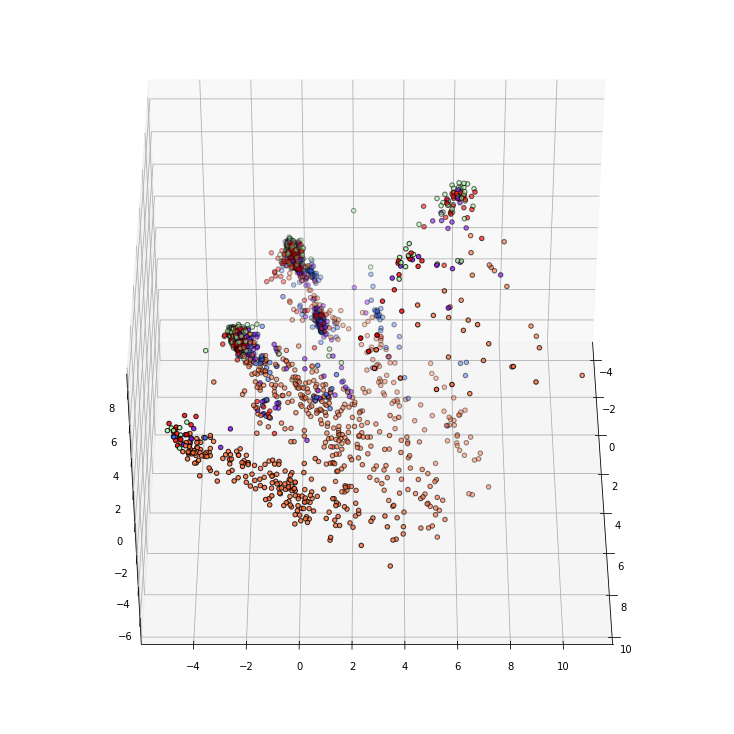

In [156]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(13 ,10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .8, 1], elev=40, azim=0)
sc = ax.scatter(x_trans[:, 0], x_trans[:, 1], x_trans[:, 2], c=y_color, cmap=plt.cm.rainbow,
           edgecolor='k')

#Not really a useful discriminatory cluster analysis